In [1]:
import numpy as np
%matplotlib inline     
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from helper_simulation import *
from helper_util import *
import pandas as pd
import os
import pyreadr

pc_alpha=0.005
quantile=1
max_id=get_max("exp_result")
exp_str=""
log_path=f"exp_result/{str(max_id)}.Danbube_river"

logger=get_logger(log_path)
path="Data"

exp_result/35.Danbube_river/xx.log


/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc.py:16: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/home/jianj0c/anaconda3/envs/py3-env/lib/python3.7/site-packages/tigramite/independence_tests/gpdc_torch.py:18: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


## load data

In [2]:
datas=dict()
for file in os.listdir(path):
    if file.endswith(".RData"):
        result = pyreadr.read_r(os.path.join(path, file))
        datas.update(result)
river_data=datas["ComTSs"].set_index('Date')
# river_data_frechet=(river_data).apply(tranform_frechet,axis=0)
# river_data_frechet_neg=(-river_data).apply(tranform_frechet,axis=0)

# rule="conservative"
# dataframeRvier=pp.DataFrame(river_data_frechet.values,var_names=river_data_frechet.columns)


In [5]:
?tp.plot_graph

Signature:
tp.plot_graph(
    graph,
    val_matrix=None,
    var_names=None,
    fig_ax=None,
    figsize=None,
    save_name=None,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_width=None,
    link_attribute=None,
    node_pos=None,
    arrow_linewidth=10.0,
    vmin_edges=-1,
    vmax_edges=1.0,
    edge_ticks=0.4,
    cmap_edges='RdBu_r',
    vmin_nodes=0,
    vmax_nodes=1.0,
    node_ticks=0.4,
    cmap_nodes='OrRd',
    node_size=0.3,
    node_aspect=None,
    arrowhead_size=20,
    curved_radius=0.2,
    label_fontsize=10,
    alpha=1.0,
    node_label_size=10,
    link_label_fontsize=10,
    lag_array=None,
    network_lower_bound=0.2,
    show_colorbar=True,
    inner_edge_style='dashed',
    link_matrix=None,
    special_nodes=None,
)
Docstring:
Creates a network plot.

This is still in beta. The network is defined from links in graph. Nodes
denote variables, straight links contemporaneous dependencies and curved
arrows lagged dependencies. The n

In [19]:
def draw_graph(edge_shape,save_path=None,**kwargs):
    edge_value=np.ones_like(edge_shape,dtype=float)
    tp.plot_graph(
        val_matrix=edge_value,
        graph=edge_shape,
        label_fontsize=10,
        cmap_edges =cm1,
        cmap_nodes =cm2,
        link_colorbar_label='TailCorr',
        save_name=save_path,##
        show_colorbar=False,
        **kwargs
        )
    if save_path is not None:
        plt.savefig(save_path,dpi=200,  pad_inches=0)
    else:
        plt.show()

In [13]:

resultsThisPaper,results_tail=method_this_paper(river_data,pc_alpha=pc_alpha,quantile=quantile,tau_max=1)

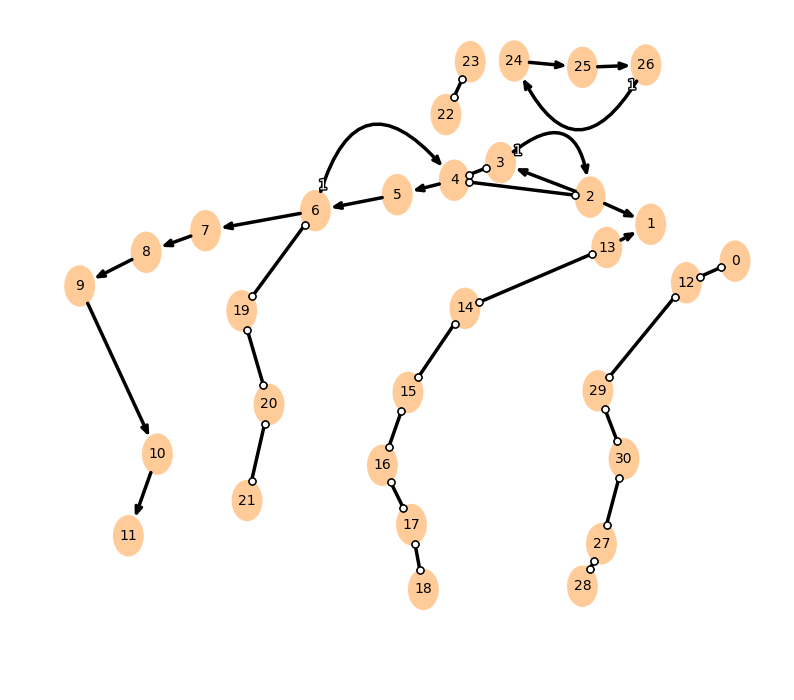

In [20]:
draw_graph(resultsThisPaper,node_pos=position_dict,figsize=(10,10),node_size=50,arrow_linewidth=5,arrowhead_size=45,curved_radius=1)